<a href="https://colab.research.google.com/github/haseeb9700/ML_Projects/blob/main/carpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [4]:
df = pd.read_csv('/content/car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.shape

(301, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
df['Fuel_Type'].replace(['Petrol', 'Diesel','CNG'], [0, 1, 2], inplace=True)
df['Seller_Type'].replace(['Dealer', 'Individual'], [0, 1], inplace=True)
df['Transmission'].replace(['Manual', 'Automatic'], [0, 1], inplace=True)

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
correlation = df.corr()

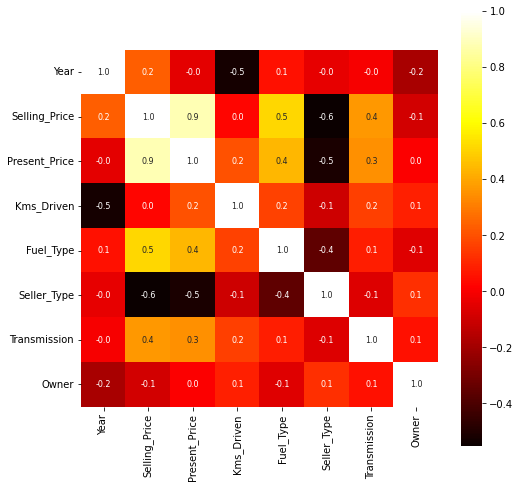

In [13]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar= True, square= True, fmt='.1f', annot =True , annot_kws={'size':8}, cmap= 'hot')

In [14]:
df.drop(['Car_Name'], axis = 1 , inplace = True)

In [15]:
X = df.drop(['Selling_Price'], axis =1 )
Y = df['Selling_Price']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [17]:
lin_reg_model=  LinearRegression()
las_reg_model=  Lasso()

In [18]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [19]:
las_reg_model.fit(X_train,Y_train)

Lasso()

In [20]:
print(lin_reg_model.score(X_test, Y_test))
print(las_reg_model.score(X_test, Y_test))


0.8365766715027051
0.8709167941173195


In [21]:
training_data_prediction = lin_reg_model.predict(X_train)
training_data_predictionlas = las_reg_model.predict(X_train)

In [22]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
error_scorelas = metrics.r2_score(Y_train, training_data_predictionlas)
print(error_score)
print(error_scorelas)

0.8799451660493711
0.8427856123435794


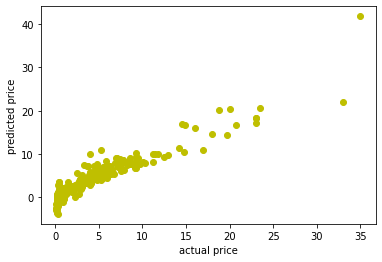

In [23]:
plt.scatter(Y_train, training_data_prediction, color='y')
plt.plot()
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()


In [24]:
test_data_prediction = lin_reg_model.predict(X_test)
test_data_predictionlas = las_reg_model.predict(X_test)

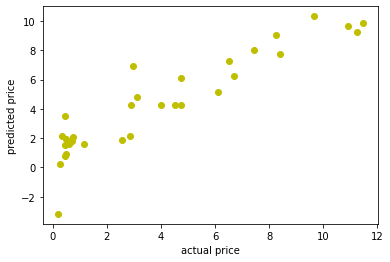

In [25]:
plt.scatter(Y_test, test_data_prediction, color='y')
plt.plot()
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()
